In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


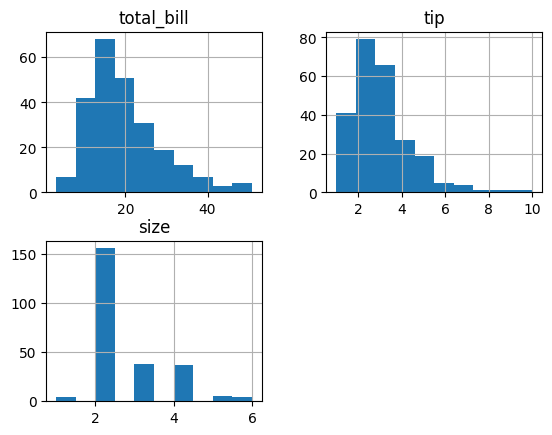

In [110]:
# ヒストグラムの表示｜全項目
df.hist()
plt.show()

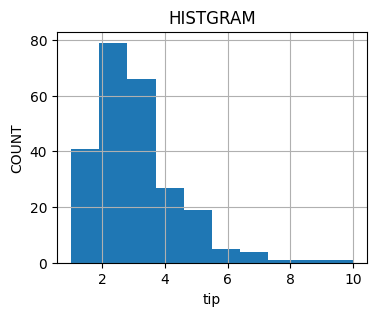

In [111]:
# ヒストグラムの表示｜特定項目の表示｜オプション指定
df.hist( 'tip' , figsize = ( 4, 3 ) )

# タイトル・ラベルの表示
plt.title("HISTGRAM")
plt.xlabel("tip")
plt.ylabel("COUNT")
plt.show()

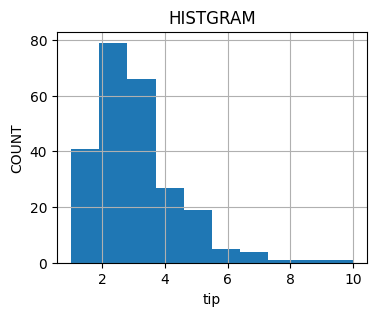

In [112]:
# ヒストグラムの表示｜特定項目の表示｜オプション指定
df.hist( 'tip' , figsize = ( 4, 3 ) )

# タイトル・ラベルの表示
plt.title("HISTGRAM")
plt.xlabel("tip")
plt.ylabel("COUNT")
plt.show()

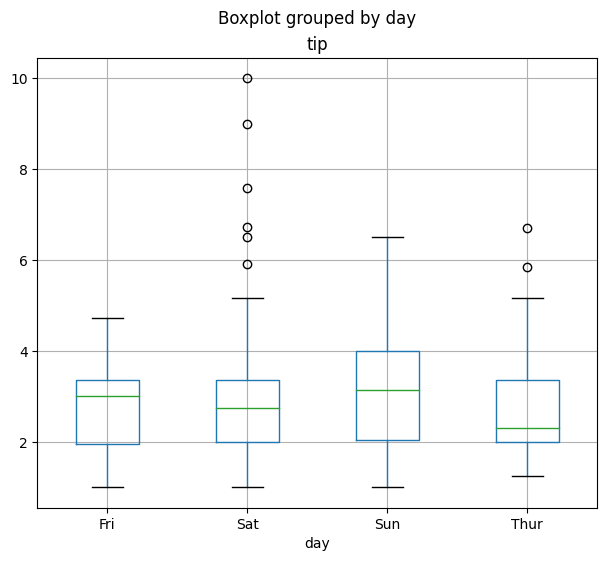

In [113]:
# 箱ひげ図
df.boxplot( column = 'tip', by = 'day' , figsize = ( 7, 6 ) )
plt.show()

まじわからにょ

いや外れ値いるだろ
一体何をしていたんだ…



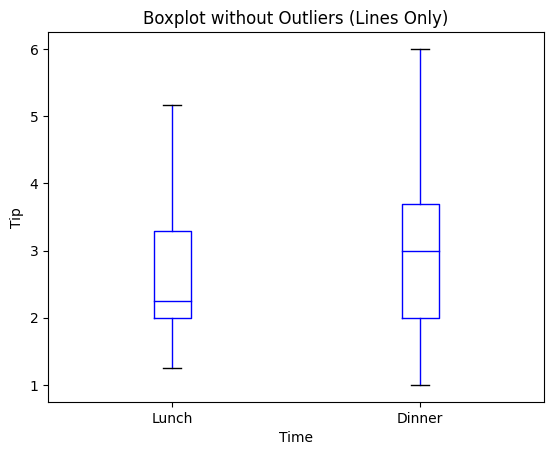

In [114]:
# 外れ値を表示せずに線で箱ひげ図を描く
fig, ax = plt.subplots()

# 箱ひげ図を描画
bp = ax.boxplot([df[df['time'] == 'Lunch']['tip'], df[df['time'] == 'Dinner']['tip']],
                labels=['Lunch', 'Dinner'],
                showfliers=False)  # 外れ値を非表示にする

# ボックス、中央線、ヒゲのスタイルを設定（線で描画）
for element in ['boxes', 'whiskers', 'medians']:
    plt.setp(bp[element], color='blue')  # 線の色を設定

plt.xlabel('Time')
plt.ylabel('Tip')
plt.title('Boxplot without Outliers (Lines Only)')
plt.show()

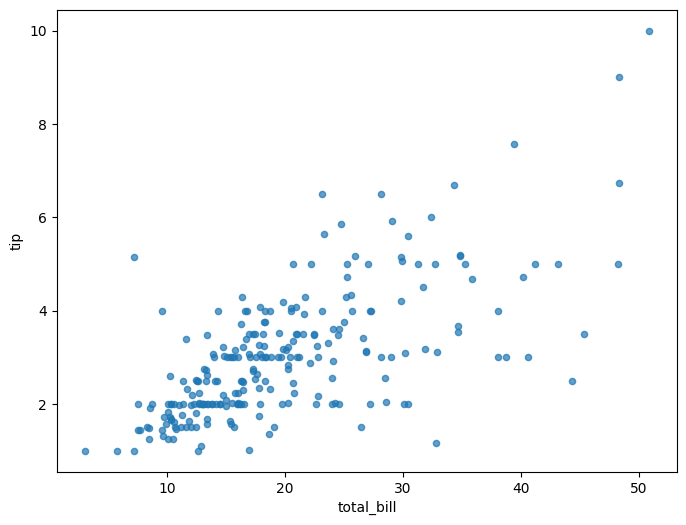

In [115]:
# 散布図
df.plot.scatter( x = 'total_bill' , y = 'tip' , figsize = ( 8, 6 ) , alpha = 0.7 )
plt.show()

In [116]:
# グラフ化するデータとして「曜日別の平均」を算出して新たなデータフレームを作成
df2 = df.groupby( 'day' ).mean()
df2

<ipython-input-116-78c1909f9abd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby( 'day' ).mean()


,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


In [117]:
# 曜日の並びを整える
df3 = df2.reindex( index = [ 'Thur', 'Fri', 'Sat' , 'Sun' ] )
df3

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


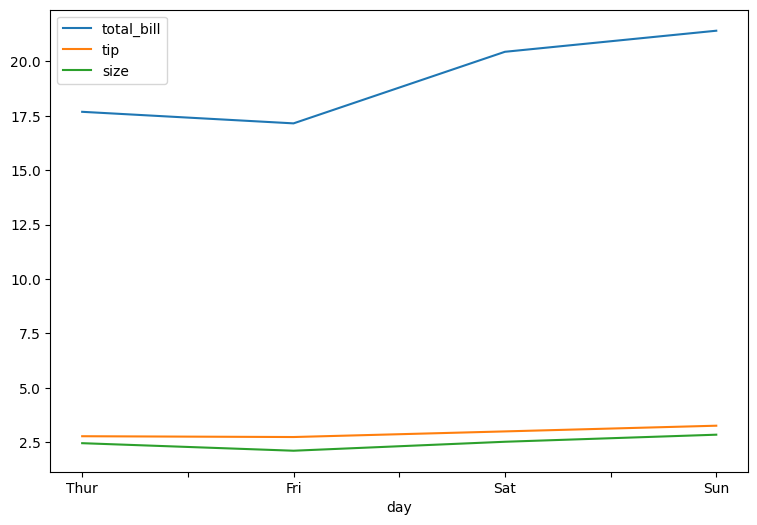

In [118]:
# 折れ線グラフの表示
df3.plot( figsize = ( 9, 6 ) )
plt.show()

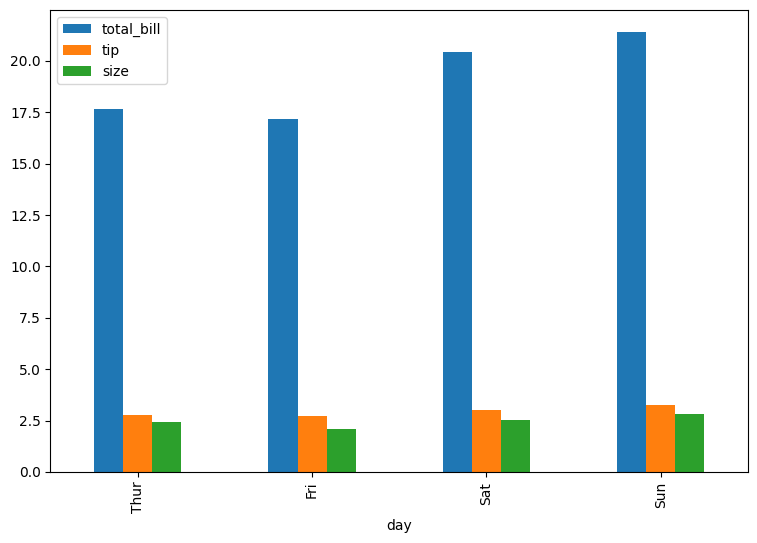

In [119]:
# 棒グラフの表示
df3.plot.bar( figsize = ( 9 , 6 ) )
plt.show()

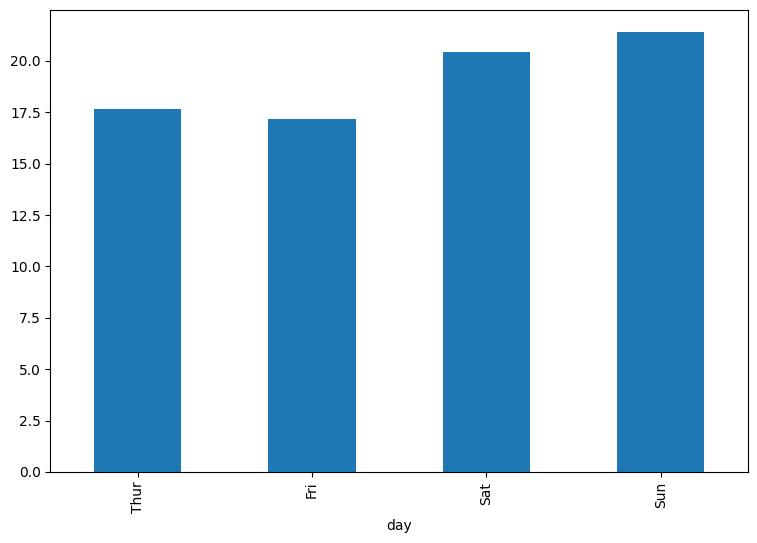

In [120]:
# 棒グラフ｜項目を絞り込み
df3[ 'total_bill' ].plot.bar( figsize = ( 9 , 6 ) )
plt.show()

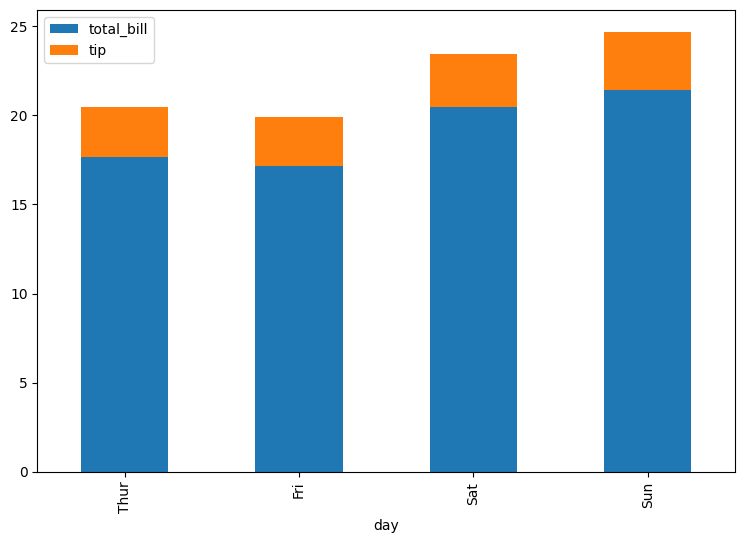

In [121]:
# 棒グラフ｜積み重ね
df3[ ['total_bill' , 'tip'] ].plot.bar( stacked=True , figsize = ( 9 , 6 ) )
plt.show()

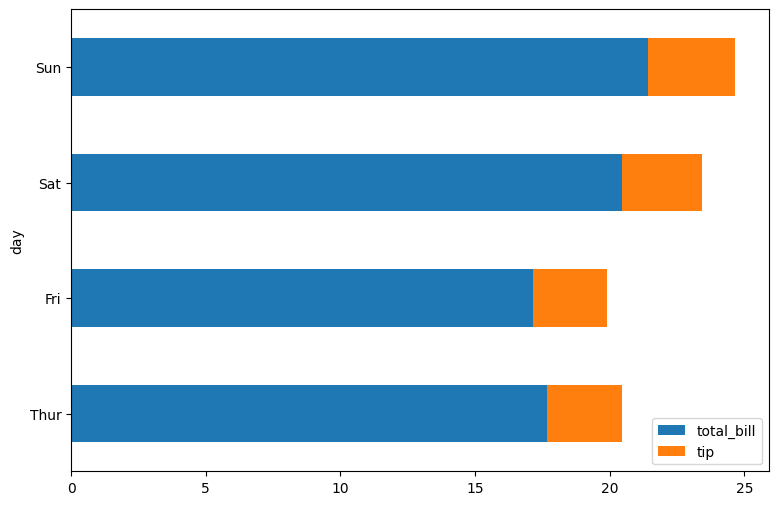

In [122]:
# 横棒グラフ｜積み重ね > bar を barh にするだけ
df3[ ['total_bill' , 'tip'] ].plot.barh( stacked=True , figsize = ( 9 , 6 ) )
plt.show()

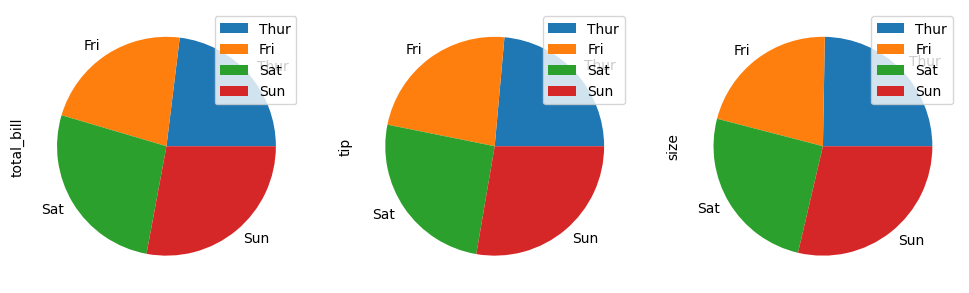

In [123]:
# 円グラフの描画
df3.plot.pie( subplots = True , figsize = (12,6) )
plt.show()

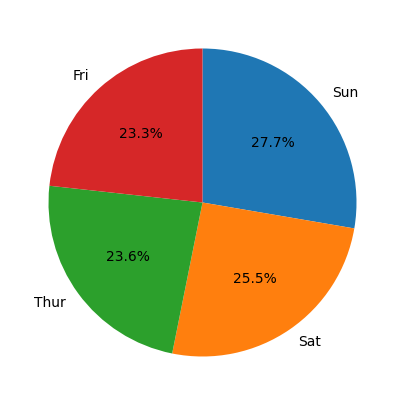

In [124]:
# Tip の額の大きい順に並べ替え
df4 = df3.sort_values( 'tip' , ascending=False )

# matplotlib の plt.pie を用いた詳細な円グラフの描画
plt.figure( figsize=(5,5))
plt.pie( df4['tip'] , labels = df4.index , autopct='%1.1f%%' , startangle=90 , counterclock=False )
plt.show()